In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
marixe_zara_sales_for_eda_path = kagglehub.dataset_download('marixe/zara-sales-for-eda')

print('Data source import complete.')


Using Colab cache for faster access to the 'zara-sales-for-eda' dataset.
Data source import complete.


<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
    <div style="font-size:150%; color:#FEE100"><b>Zara Sales EDA and Predictor</b></div>
    <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div>
</div>

Welcome curious reader. In this notebook we inspect a dataset of Zara sales that tells us interesting stories about product pricing, seasonal trends, and promotions. If you find this notebook useful, please consider upvoting it.


## Table of Contents

1. [Imports and Settings](#Imports-and-Settings)
2. [Data Loading](#Data-Loading)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
    - [Descriptive Statistics](#Descriptive-Statistics)
    - [Visualizations](#Visualizations)
4. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
5. [Predictive Modeling - Sales Volume Predictor](#Predictive-Modeling---Sales-Volume-Predictor)
6. [Discussion and Future Work](#Discussion-and-Future-Work)

In [ ]:
# Imports and Settings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # using Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # if only plt is imported, we switch backend
get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

print('Imports and settings completed.')

Imports and settings completed.


In [ ]:
# Data Loading
import os

# It is important to set the correct delimiter and encoding while reading the file.
# In case of error during reading, double-check these parameters as they are common pitfalls.

file_path = '/kaggle/input/zara-sales-for-eda/Zara_sales_EDA.csv'
try:
    df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')
    print('Data loaded successfully with shape:', df.shape)
except Exception as e:
    print('An error occurred while reading the CSV file:', e)

# Display the first few rows of the dataframe
df.head()

Data loaded successfully with shape: (20252, 17)


,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


## Exploratory Data Analysis (EDA)

The dataset provides interesting dimensions like promotions, seasonal effects, and product pricing that might tell us how different factors influence sales volume. Below, we derive some basic descriptive statistics and insightful visualizations.

### Descriptive Statistics

We inspect basic statistics and structural information from the dataset.

In [ ]:
# Descriptive Statistics
print('Dataset Information:')
print(df.info())

print('\nStatistical Summary:')
print(df.describe(include='all'))

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        20252 non-null  int64  
 1   Product Position  20252 non-null  object 
 2   Promotion         20252 non-null  object 
 3   Product Category  20252 non-null  object 
 4   Seasonal          20252 non-null  object 
 5   Sales Volume      20252 non-null  int64  
 6   brand             20252 non-null  object 
 7   url               20252 non-null  object 
 8   name              20251 non-null  object 
 9   description       20250 non-null  object 
 10  price             20252 non-null  float64
 11  currency          20252 non-null  object 
 12  terms             20252 non-null  object 
 13  section           20252 non-null  object 
 14  season            20252 non-null  object 
 15  material          20252 non-null  object 
 16  origin            2

### Visualizations

We explore various visualizations to gain further insights into the data.

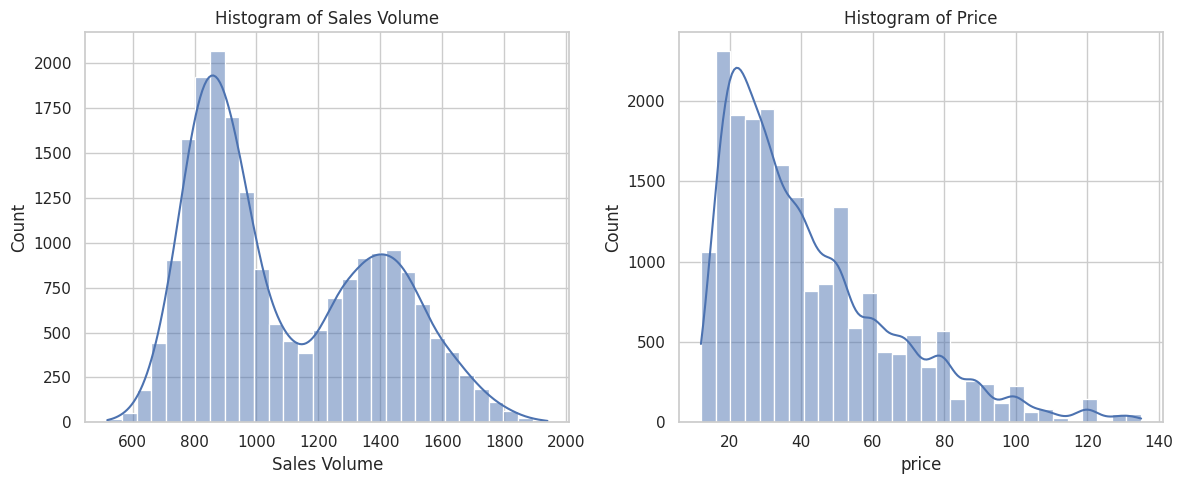

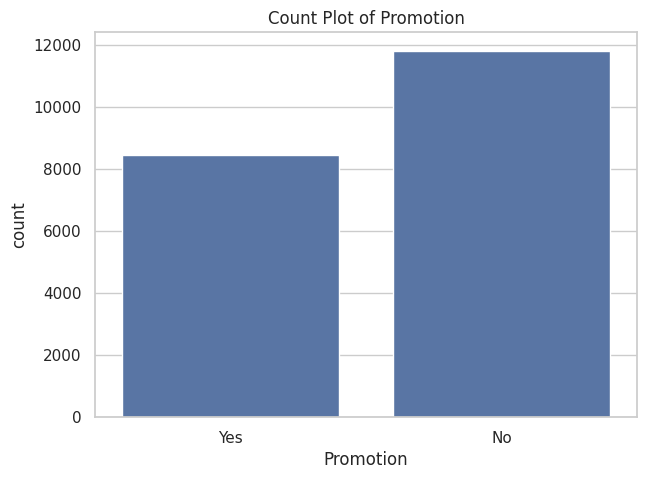

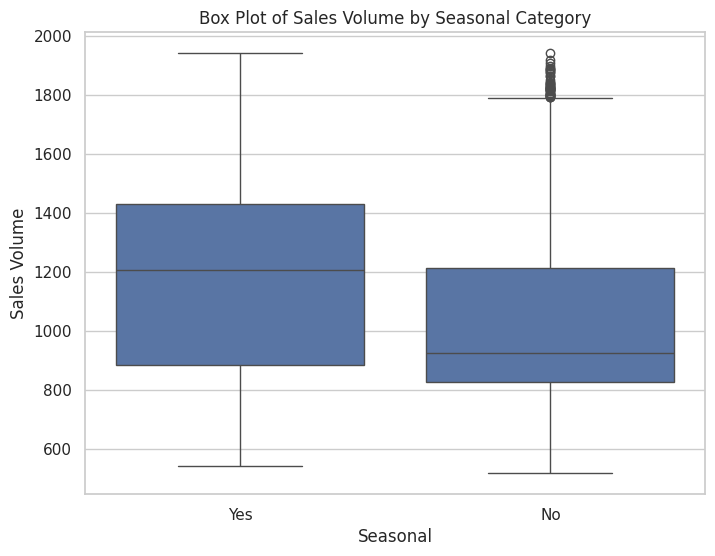

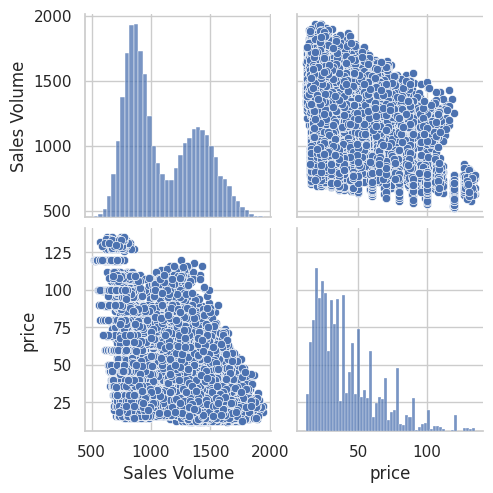

In [ ]:
# Visualizations

# Plotting histogram for numeric columns: 'Sales Volume' and 'price'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Sales Volume'], bins=30, kde=True)
plt.title('Histogram of Sales Volume')

plt.subplot(1, 2, 2)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Histogram of Price')

plt.tight_layout()
plt.show()

# Count plot for the categorical variable 'Promotion'
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Promotion')
plt.title('Count Plot of Promotion')
plt.show()

# Box Plot for Sales Volume by Seasonal category
plt.figure(figsize=(8, 6))
sns.boxplot(x='Seasonal', y='Sales Volume', data=df)
plt.title('Box Plot of Sales Volume by Seasonal Category')
plt.show()

# Pair Plot for a subset of columns if applicable
cols_for_pairplot = ['Sales Volume', 'price']
sns.pairplot(df[cols_for_pairplot])
plt.show()

## Data Cleaning and Preprocessing

Before modeling, we perform data cleaning and minor preprocessing steps.

In this section we:
- Check for missing values
- Convert any fields to appropriate datatypes if necessary

Note: Although the dataset description does not mention explicit date fields, if such columns are added in the future these methods can be used to infer and process date types.

In [ ]:
# Data Cleaning and Preprocessing
print('Missing values in each column:')
print(df.isnull().sum())

# If we have any missing values in critical categorical columns, we might fill them with mode
categorical_cols = ['Promotion', 'Seasonal', 'Product Category']
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f'Filled missing values in {col} with mode.')

# Check again for missing values
print('\nMissing values after cleaning:')
print(df.isnull().sum())

Missing values in each column:
Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                1
description         2
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64

Missing values after cleaning:
Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
name                1
description         2
price               0
currency            0
terms               0
section             0
season              0
material            0
origin              0
dtype: int64


## Predictive Modeling - Sales Volume Predictor

In this section we build a predictor to forecast the 'Sales Volume' of a product based on selected features.

For simplicity, our features will include:

- 'price' (numerical)
- 'Promotion' (categorical)
- 'Seasonal' (categorical)

We use a pipeline combining one-hot encoding for the categorical features and scaling for the numerical feature. A Random Forest Regressor is used to build the predictor.

In [ ]:
# Predictive Modeling for Sales Volume

# Selecting the predictor variables and the target variable
features = ['price', 'Promotion', 'Seasonal']
target = 'Sales Volume'

# Splitting the data into training and testing sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the column transformer for preprocessing
numeric_features = ['price']
numeric_transformer = StandardScaler()

categorical_features = ['Promotion', 'Seasonal']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creating a pipeline that first preprocesses the data, then fits a Random Forest Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model using R2 score and Mean Squared Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Random Forest Regressor R2 Score: {r2:.3f}')
print(f'Random Forest Regressor Mean Squared Error: {mse:.3f}')

Random Forest Regressor R2 Score: 0.856
Random Forest Regressor Mean Squared Error: 12650.487


## Discussion and Future Work

This notebook presented various facets of the Zara sales dataset. We began by exploring the data with summary statistics and multiple visualization techniques to better understand the relationship between product attributes and sales volume. We then created a predictor using a Random Forest Regressor to forecast sales volume based on price, promotion, and seasonal information.

Merits of our approach include the use of a preprocessing pipeline to handle categorical and numerical data, as well as the evaluation of our model via key metrics such as R2 and MSE.

For future work, a deeper feature engineering process may be deployed, such as incorporating additional product attributes, text features from the product description, or even temporal aspects if dates become available. Advanced modeling techniques like cross-validation, hyperparameter tuning, or ensemble methods could further improve predictive performance.

If you found this notebook insightful and helpful, please consider upvoting it.

In [ ]:
# Check column names
print(df.columns)

# If material column name is lowercase or has spaces, fix it
if 'material' in df.columns:
    df.rename(columns={'material': 'Material'}, inplace=True)

# Preview unique materials
print("Unique materials:", df['Material'].unique())


Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'name', 'description',
       'price', 'currency', 'terms', 'section', 'season', 'material',
       'origin'],
      dtype='object')
Unique materials: ['Polyester' 'Cotton' 'Wool Blend' 'Acrylic' 'Wool' 'Viscose' 'Linen'
 'Denim' 'Linen Blend' 'Satin' 'Silk']


In [ ]:
print(df.columns.tolist())


['Product ID', 'Product Position', 'Promotion', 'Product Category', 'Seasonal', 'Sales Volume', 'brand', 'url', 'name', 'description', 'price', 'currency', 'terms', 'section', 'season', 'Material', 'origin']


In [ ]:
# Group summary for sales by Material
material_summary = (
    df.groupby('Material')['Sales Volume']
    .agg(['count', 'mean', 'median', 'std'])
    .sort_values(by='mean', ascending=False)
)

print("Sales Summary by Material:\n")
print(material_summary)


Sales Summary by Material:

             count         mean  median         std
Material                                           
Linen Blend    807  1125.240397  1021.0  310.930963
Acrylic        881  1119.257662  1024.0  298.611644
Wool Blend    3373  1106.111177  1004.0  297.011882
Wool          3805  1105.521156   992.0  304.885572
Linen         2573  1104.127478   998.0  299.447936
Cotton        3851  1091.226175   986.0  296.182759
Viscose        990  1085.854545   978.5  292.241626
Satin          132  1078.666667   956.5  287.469976
Polyester     2775  1078.218018   968.0  291.241664
Denim         1027  1070.890944   947.0  292.503064
Silk            38  1066.473684   906.5  295.679587


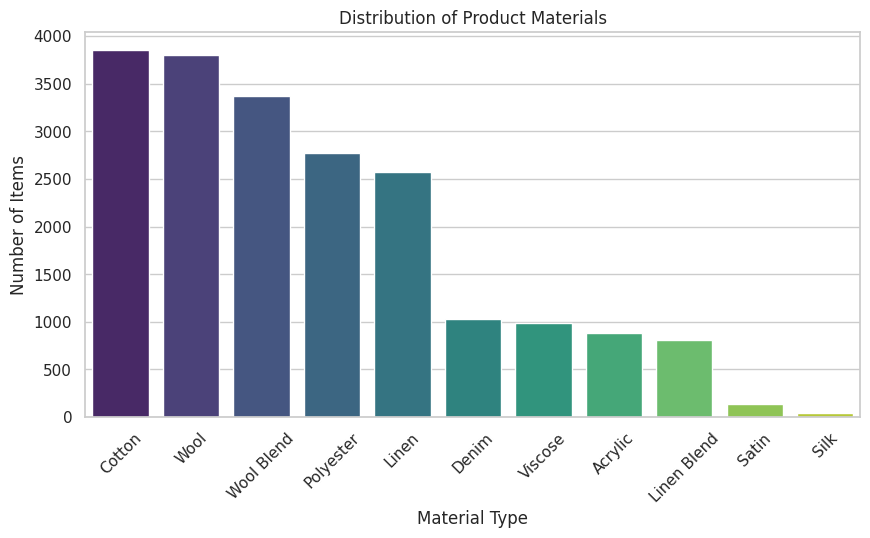

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Material',
              order=df['Material'].value_counts().index,
              palette='viridis')
plt.title('Distribution of Product Materials')
plt.xlabel('Material Type')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)
plt.show()


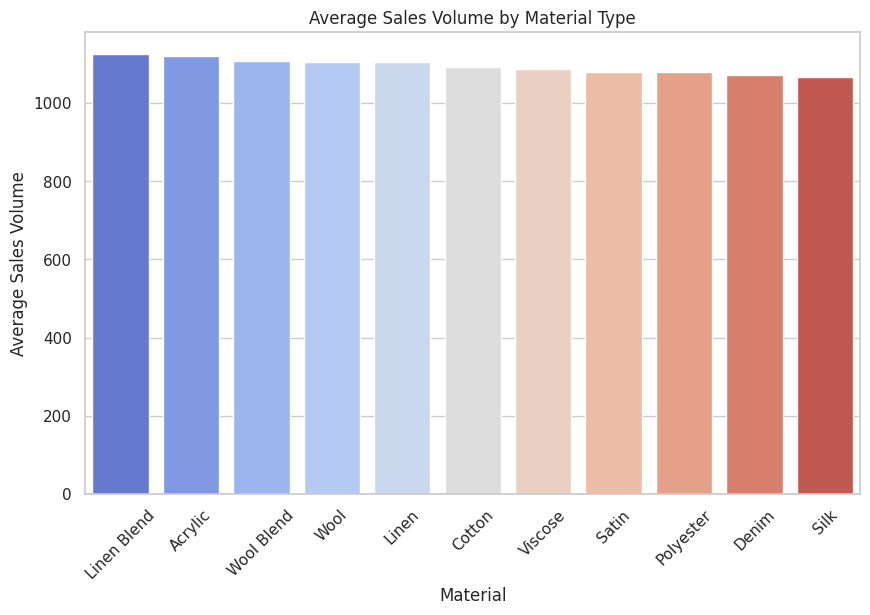

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Material', y='Sales Volume',
            estimator='mean', ci=None, palette='coolwarm',
            order=df.groupby('Material')['Sales Volume']
                   .mean().sort_values(ascending=False).index)
plt.title('Average Sales Volume by Material Type')
plt.xlabel('Material')
plt.ylabel('Average Sales Volume')
plt.xticks(rotation=45)
plt.show()


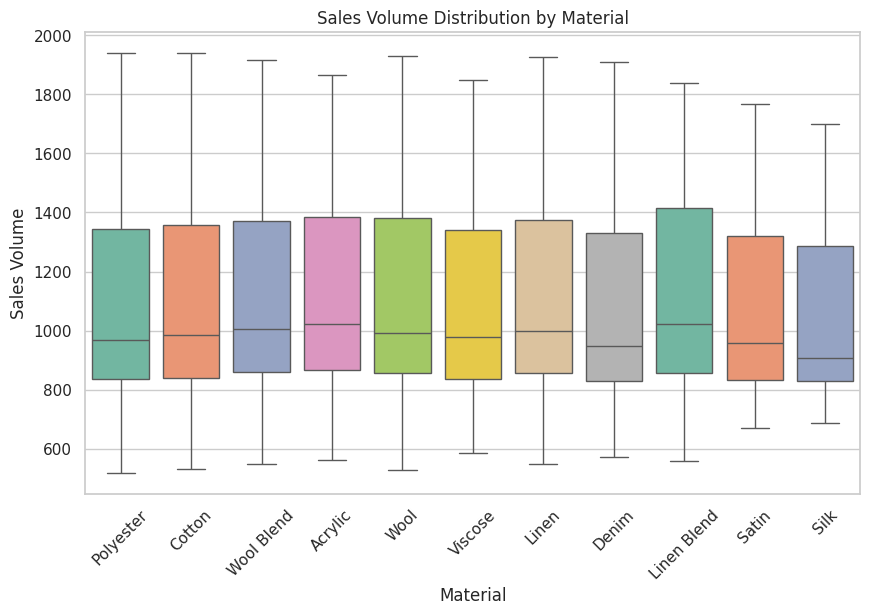

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Material', y='Sales Volume', palette='Set2')
plt.title('Sales Volume Distribution by Material')
plt.xlabel('Material')
plt.ylabel('Sales Volume')
plt.xticks(rotation=45)
plt.show()


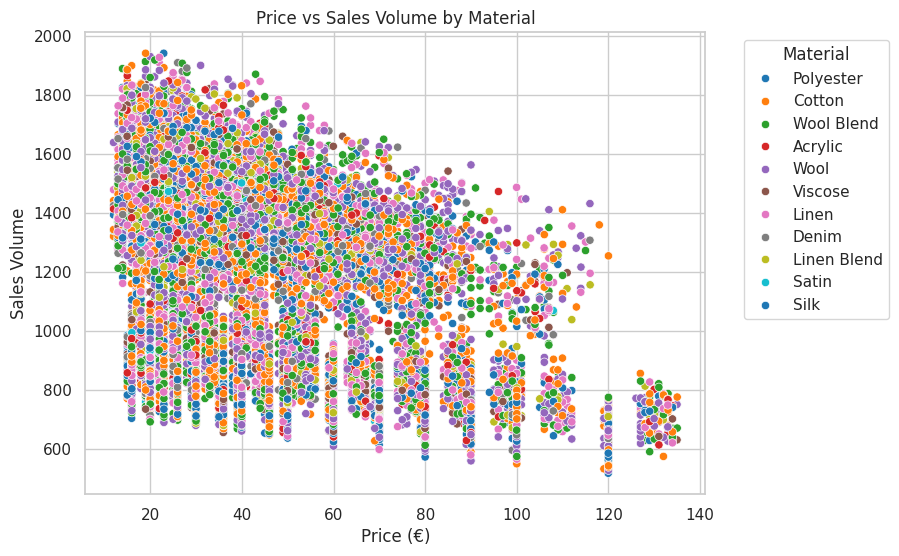

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='price', y='Sales Volume',
                hue='Material', palette='tab10')
plt.title('Price vs Sales Volume by Material')
plt.xlabel('Price (€)')
plt.ylabel('Sales Volume')
plt.legend(bbox_to_anchor=(1.05, 1), title='Material')
plt.show()


In [ ]:
from scipy import stats

anova_result = stats.f_oneway(
    *(df[df['Material'] == m]['Sales Volume'] for m in df['Material'].unique())
)

print(f"ANOVA F-statistic = {anova_result.statistic:.3f}")
print(f"P-value = {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("✅ Significant difference: material type affects sales volume.")
else:
    print("❌ No significant difference: material type may not strongly influence sales.")


ANOVA F-statistic = 4.250
P-value = 0.0000
✅ Significant difference: material type affects sales volume.


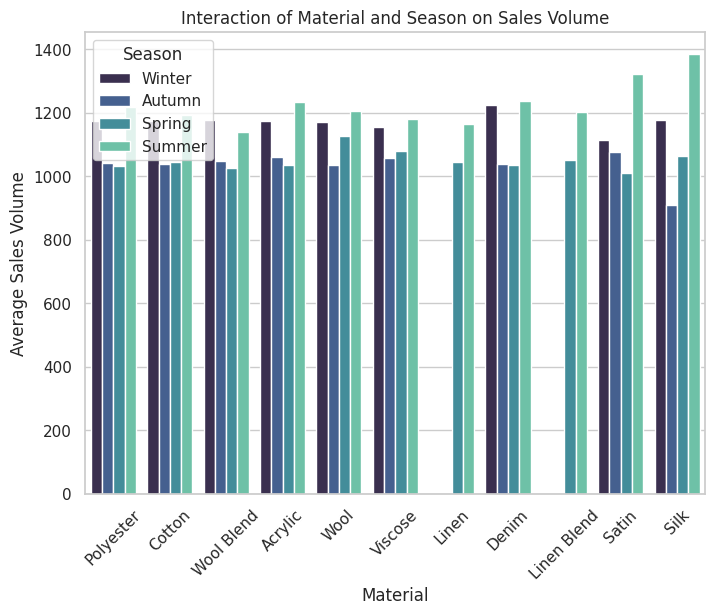

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='Material', y='Sales Volume', hue='season',
            ci=None, palette='mako')
plt.title('Interaction of Material and Season on Sales Volume')
plt.xlabel('Material')
plt.ylabel('Average Sales Volume')
plt.legend(title='Season')
plt.xticks(rotation=45)
plt.show()
